# Downloading the dataset from kaggle

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hotsonhonet","key":"e6cb444362df8bdc68a95a96af34b13c"}'}

In [3]:
!mkdir -p ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d cashutosh/gender-classification-dataset

 97% 260M/269M [00:01<00:00, 224MB/s]
100% 269M/269M [00:01<00:00, 219MB/s]


In [7]:
!ls

gender-classification-dataset.zip  kaggle.json	sample_data


In [8]:
from zipfile import ZipFile

with ZipFile("gender-classification-dataset.zip", 'r') as file:
    file.extractall()
file.close()

# Importing Modules

In [9]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading up the data

In [10]:
train_data = 'Training'
val_data = 'Validation'

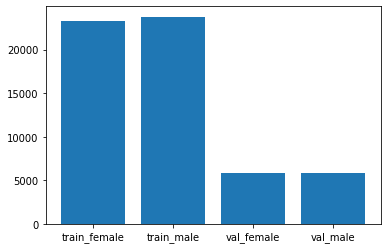

In [11]:
train_male_count = len(os.listdir(f'{train_data}/male'))
train_female_count = len(os.listdir(f'{train_data}/female'))
val_male_count = len(os.listdir(f'{val_data}/male'))
val_female_count = len(os.listdir(f'{val_data}/female'))

train_size = train_male_count + train_female_count
val_size = val_male_count + val_female_count

labels = ['train_female', 'train_male', 'val_female', 'val_male']
frequency = [train_female_count, train_male_count, val_female_count, val_male_count]

plt.bar(labels, frequency);

# Creating imageGenerators

In [12]:
target_size = (224, 224)
batch_size = 30
mode = 'binary'

In [13]:
datagen = ImageDataGenerator(rescale=1. / 255,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

In [14]:
train_gen = datagen.flow_from_directory(train_data,
                                       target_size=target_size,
                                       batch_size=batch_size,
                                       class_mode=mode)


Found 47009 images belonging to 2 classes.


In [16]:
val_gen = datagen.flow_from_directory(val_data,
                                       target_size=target_size,
                                       batch_size=batch_size,
                                       class_mode=mode)

Found 11649 images belonging to 2 classes.


# Using the inFamous VGG-16 model 😁

In [17]:
class Model:

    def vgg_model(self, trainable, loss, metrics, optimizer):
        self.vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
        self.vgg.trainable = trainable

        self.model = Sequential()
        self.model.add(self.vgg)
        self.model.add(Flatten())
        self.model.add(Dense(256, activation='relu'))
        self.model.add(Dense(1, activation='sigmoid'))

        self.model.compile(loss=loss, metrics=metrics, optimizer=optimizer)

        return self.model


In [18]:
model = Model()
model = model.vgg_model(False, 'binary_crossentropy', ['accuracy'], 'adam')

58892288/58889256 [==============================] - 0s 0us/step


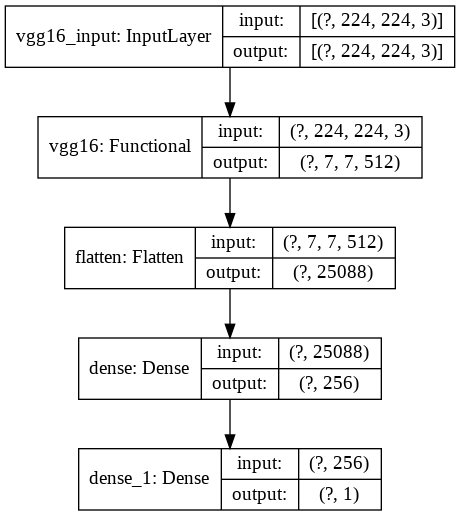

In [19]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [20]:
!pip install livelossplot

In [21]:
from livelossplot import PlotLossesKeras
from tensorflow.keras.callbacks import ReduceLROnPlateau

liveplot = PlotLossesKeras()
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor=0.2, patience = 50, min_lr = 2e-6, mode = 'min')


callbacks = [liveplot]

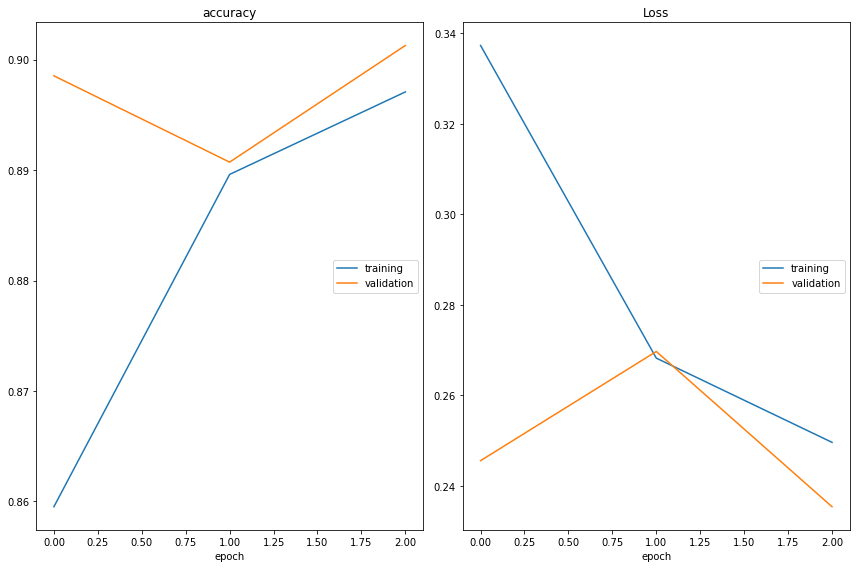

accuracy
	training         	 (min:    0.860, max:    0.897, cur:    0.897)
	validation       	 (min:    0.891, max:    0.901, cur:    0.901)
Loss
	training         	 (min:    0.250, max:    0.337, cur:    0.250)
	validation       	 (min:    0.235, max:    0.270, cur:    0.235)
1566/1566 [==============================] - 705s 450ms/step - loss: 0.2496 - accuracy: 0.8971 - val_loss: 0.2354 - val_accuracy: 0.9013


In [22]:
training_history = model.fit_generator(train_gen,
                                        steps_per_epoch = train_size // batch_size,
                                        epochs=3,
                                        validation_data=val_gen,
                                        validation_steps = val_size // batch_size,
                                        verbose=1,
                                        callbacks=[callbacks])

# Saving the weights and downloading the model

In [27]:
model.save("/content/Saved_model")

INFO:tensorflow:Assets written to: /content/Saved_model/assets


In [28]:
!zip -r /content/GenderClassifier_Model.zip /content/Saved_model

  adding: content/Saved_model/ (stored 0%)
  adding: content/Saved_model/saved_model.pb (deflated 92%)
  adding: content/Saved_model/variables/ (stored 0%)
  adding: content/Saved_model/variables/variables.data-00000-of-00001 (deflated 25%)
  adding: content/Saved_model/variables/variables.index (deflated 65%)
  adding: content/Saved_model/assets/ (stored 0%)


In [29]:
!ls

gender-classification-dataset.zip  kaggle.json	   sample_data	Training
GenderClassifier_Model.zip	   model_plot.png  Saved_model	Validation


In [30]:
from google.colab import files
files.download("GenderClassifier_Model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>